In [1]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from sklearn.preprocessing import StandardScaler

In [18]:
aisles = pd.read_csv("aisles.csv")
products = pd.read_csv("products.csv")
departments = pd.read_csv("departments.csv")
orders = pd.read_csv("orders.csv")
orders_prior = pd.read_csv("order_products__prior.csv")
orders_train = pd.read_csv("order_products__train.csv")

In [21]:
orders['days_since_prior_order'].fillna(value=0,inplace=True)

In [22]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [5]:
orders_prior.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [6]:
orders_prior_sample = orders_prior.sample(500000)

In [7]:
aisles['aisle'] = aisles['aisle'].astype('category')
departments['department'] = departments['department'].astype('category')
orders['eval_set'] = orders['eval_set'].astype('category')
products['product_name'] = products['product_name'].astype('category')

In [11]:
orders_prior_sample['order_id'].shape

(500000,)

In [26]:
orders_sample = orders.merge(orders_prior_sample,how='inner',on='order_id')

In [27]:
orders_sample.isnull().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
dtype: int64

In [28]:
orders_sample

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1199898,2,prior,6,2,9,13.0,41787,19,0
1,788338,2,prior,8,1,15,27.0,32052,7,1
2,788338,2,prior,8,1,15,27.0,32792,1,1
3,1718559,2,prior,9,2,9,8.0,48099,19,0
4,1402090,2,prior,11,1,10,30.0,16589,10,1
...,...,...,...,...,...,...,...,...,...,...
499995,1285346,206208,prior,48,1,11,5.0,43086,7,1
499996,1882108,206208,prior,49,1,22,7.0,23579,3,1
499997,3154581,206209,prior,1,3,11,0.0,13176,10,0
499998,2266710,206209,prior,10,5,18,29.0,15700,3,0


In [350]:
user = orders_sample.groupby('user_id')['order_id'].count().to_frame("Total_orders")

In [351]:
user = user.reset_index()

In [31]:
user_reorder = orders_sample.groupby('user_id')['reordered'].mean().to_frame("U_reorder_ratio")

In [32]:
user_reorder = user_reorder.reset_index()

In [352]:
user = user.merge(user_reorder,how='left',on='user_id')

In [34]:
user

,user_id,Total_orders,U_reorder_ratio
0,2,11,0.600000
1,6,2,0.000000
2,7,18,0.000000
3,8,1,0.000000
4,10,3,0.000000
...,...,...,...
139909,206204,3,0.000000
139910,206206,55,0.666667
139911,206207,16,0.800000
139912,206208,49,0.933333


In [35]:
prod = orders_sample.groupby('product_id')['order_id'].count().to_frame("(N)Product_purchased")

In [36]:
prod = prod.reset_index()

In [37]:
prod_reorder = orders_sample.groupby('product_id')['reordered'].mean().to_frame("P_reorder_ratio")

In [38]:
prod_reorder = prod_reorder.reset_index()

In [40]:
prod.isnull().sum()

product_id              0
(N)Product_purchased    0
dtype: int64

In [41]:
prod = prod.merge(prod_reorder,how='left',on='product_id')

In [43]:
u_p = orders_sample.groupby(['user_id','product_id'])['order_id'].count().to_frame("total_bought")

In [44]:
u_p = u_p.reset_index()

In [45]:
times = u_p

In [54]:
total_orders = orders_sample.groupby('user_id')['order_number'].max().to_frame("Total_orders")
total_orders = total_orders.reset_index()

In [51]:
first_order_num = orders_sample.groupby(['user_id','product_id'])['order_number'].min().to_frame("first_order_num")
first_order_num = first_order_num.reset_index()

In [55]:
span = pd.merge(total_orders,first_order_num,how='right',on='user_id')

In [61]:
span['Order_range_D'] = span.Total_orders - span.first_order_num + 1

In [62]:
uxp_ratio = pd.merge(times,span,how='left',on=['user_id','product_id'])

In [63]:
uxp_ratio

,user_id,product_id,total_bought,Total_orders,first_order_num,Order_range_D
0,2,16589,1,11,11,1
1,2,32052,1,11,8,4
2,2,32792,1,11,8,4
3,2,41787,1,11,6,6
4,2,48099,1,11,9,3
...,...,...,...,...,...,...
476866,206208,43086,1,49,48,2
476867,206208,44359,2,49,27,23
476868,206209,13176,1,12,1,12
476869,206209,15700,1,12,10,3


In [64]:
uxp_ratio['uxp_reorder_ratio'] = uxp_ratio.total_bought / uxp_ratio.Order_range_D

In [66]:
uxp_ratio = uxp_ratio.drop(['Total_orders','first_order_num','Order_range_D'],axis=1)

In [67]:
uxp_ratio

,user_id,product_id,total_bought,uxp_reorder_ratio
0,2,16589,1,1.000000
1,2,32052,1,0.250000
2,2,32792,1,0.250000
3,2,41787,1,0.166667
4,2,48099,1,0.333333
...,...,...,...,...
476866,206208,43086,1,0.500000
476867,206208,44359,2,0.086957
476868,206209,13176,1,0.083333
476869,206209,15700,1,0.333333


In [69]:
data = uxp_ratio.merge(user,on='user_id',how='left')

In [72]:
data.isnull().sum()

user_id                 0
product_id              0
total_bought            0
uxp_reorder_ratio       0
Total_orders            0
U_reorder_ratio         0
(N)Product_purchased    0
P_reorder_ratio         0
dtype: int64

In [71]:
data = data.merge(prod,how='left',on='product_id')

In [73]:
orders_sample.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1199898,2,prior,6,2,9,13.0,41787,19,0
1,788338,2,prior,8,1,15,27.0,32052,7,1
2,788338,2,prior,8,1,15,27.0,32792,1,1
3,1718559,2,prior,9,2,9,8.0,48099,19,0
4,1402090,2,prior,11,1,10,30.0,16589,10,1


In [76]:
add_cart = orders_sample.groupby(['user_id','product_id'])['add_to_cart_order'].mean().to_frame("Cart_priority")
add_cart = add_cart.reset_index()

In [77]:
add_cart

,user_id,product_id,Cart_priority
0,2,16589,10.0
1,2,32052,7.0
2,2,32792,1.0
3,2,41787,19.0
4,2,48099,19.0
...,...,...,...
476866,206208,43086,7.0
476867,206208,44359,5.0
476868,206209,13176,10.0
476869,206209,15700,3.0


In [78]:
data = data.merge(add_cart,how='left',on=['user_id','product_id'])

In [79]:
data.isnull().sum()

user_id                 0
product_id              0
total_bought            0
uxp_reorder_ratio       0
Total_orders            0
U_reorder_ratio         0
(N)Product_purchased    0
P_reorder_ratio         0
Cart_priority           0
dtype: int64

In [80]:
data.to_csv("sample_sprint3_final.csv")

In [81]:
orders_future = orders[((orders.eval_set=='train') | (orders.eval_set=='test'))]
orders_future = orders_future[ ['user_id', 'eval_set', 'order_id'] ]

In [82]:
orders_future

,user_id,eval_set,order_id
10,1,train,1187899
25,2,train,1492625
38,3,test,2774568
44,4,test,329954
49,5,train,2196797
...,...,...,...
3420933,206205,train,1716008
3421001,206206,test,1043943
3421018,206207,test,2821651
3421068,206208,test,803273


In [262]:
data2 = data.merge(orders_future,how='left',on='user_id')

In [296]:
data_train = data2[data2.eval_set=='train']

In [281]:
data_train.isnull().sum()

user_id                 0
product_id              0
total_bought            0
uxp_reorder_ratio       0
Total_orders            0
U_reorder_ratio         0
(N)Product_purchased    0
P_reorder_ratio         0
Cart_priority           0
eval_set                0
order_id                0
dtype: int64

In [297]:
data_train

,user_id,product_id,total_bought,uxp_reorder_ratio,Total_orders,U_reorder_ratio,(N)Product_purchased,P_reorder_ratio,Cart_priority,eval_set,order_id
0,2,16589,1,1.000000,11,0.600000,97,0.680412,10.0,train,1492625
1,2,32052,1,0.250000,11,0.600000,68,0.573529,7.0,train,1492625
2,2,32792,1,0.250000,11,0.600000,24,0.583333,1.0,train,1492625
3,2,41787,1,0.166667,11,0.600000,551,0.633394,19.0,train,1492625
4,2,48099,1,0.333333,11,0.600000,42,0.571429,19.0,train,1492625
...,...,...,...,...,...,...,...,...,...,...,...
476845,206203,16525,1,1.000000,4,0.500000,69,0.434783,24.0,train,2371631
476846,206203,25256,1,0.333333,4,0.500000,101,0.584158,25.0,train,2371631
476868,206209,13176,1,0.083333,12,0.333333,5862,0.827192,10.0,train,272231
476869,206209,15700,1,0.333333,12,0.333333,59,0.728814,3.0,train,272231


In [283]:
orders_train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [298]:
data_train = data_train.merge(orders_train[['product_id','order_id', 'reordered']], on=['product_id','order_id'], how='left' )

In [285]:
data_train.isnull().sum()

user_id                      0
product_id                   0
total_bought                 0
uxp_reorder_ratio            0
Total_orders                 0
U_reorder_ratio              0
(N)Product_purchased         0
P_reorder_ratio              0
Cart_priority                0
eval_set                     0
order_id                     0
reordered               243981
dtype: int64

In [304]:
data_train['reordered'] = data_train['reordered'].fillna(0)

In [305]:
data_train = data_train.set_index(['user_id','product_id'])

In [306]:
data_train = data_train.drop(['eval_set','order_id'],axis=1)

In [307]:
data_train.head()

total_bought  uxp_reorder_ratio  Total_orders  \
user_id product_id                                                  
2       16589                  1           1.000000            11   
        32052                  1           0.250000            11   
        32792                  1           0.250000            11   
        41787                  1           0.166667            11   
        48099                  1           0.333333            11   

                    U_reorder_ratio  (N)Product_purchased  P_reorder_ratio  \
user_id product_id                                                           
2       16589                   0.6                    97         0.680412   
        32052                   0.6                    68         0.573529   
        32792                   0.6                    24         0.583333   
        41787                   0.6                   551         0.633394   
        48099                   0.6                    42         0.571429   

                    Cart_priority  reordered  
user_id product_id                            
2       16589                  10        1.0  
        32052                   7        0.0  
        32792                   1        1.0  
        41787                  19        1.0  
        48099                  19        0.0

In [188]:
data_test = data2[data2.eval_set =='test']

In [189]:
data_test = data_test.set_index(['user_id', 'product_id'])

In [190]:
data_test = data_test.drop(['eval_set','order_id'], axis=1)

In [191]:
data_test

total_bought  uxp_reorder_ratio  Total_orders  \
user_id product_id                                                  
6       40992                  1           1.000000             2   
11      8309                   1           0.333333             6   
        16869                  1           0.166667             6   
        27959                  1           1.000000             6   
        30855                  1           0.500000             6   
...                          ...                ...           ...   
206208  27966                  1           0.071429            49   
        34213                  2           0.050000            49   
        35688                  1           0.250000            49   
        43086                  1           0.500000            49   
        44359                  2           0.086957            49   

                    U_reorder_ratio  (N)Product_purchased  P_reorder_ratio  \
user_id product_id                                                           
6       40992              0.000000                    59         0.457627   
11      8309               0.500000                   163         0.687117   
        16869              0.500000                    15         0.600000   
        27959              0.500000                    29         0.551724   
        30855              0.500000                    30         0.333333   
...                             ...                   ...              ...   
206208  27966              0.933333                  2152         0.777881   
        34213              0.933333                    19         0.631579   
        35688              0.933333                    24         0.541667   
        43086              0.933333                   221         0.615385   
        44359              0.933333                  1094         0.619744   

                    Cart_priority  
user_id product_id                 
6       40992                 3.0  
11      8309                  2.0  
        16869                 7.0  
        27959                10.0  
        30855                 6.0  
...                           ...  
206208  27966                 5.0  
        34213                 3.0  
        35688                 4.0  
        43086                 7.0  
        44359                 5.0  

[173599 rows x 7 columns]

In [299]:
data_train['Cart_priority'] = data_train['Cart_priority'].astype(int)

In [300]:
sc = StandardScaler()

In [310]:
std_data = sc.fit_transform(data_train)

In [293]:
data_train_std[['total_bought','Total_orders','(N)Product_purchased','Cart_priority']]= sc.fit_transform(data_train_std[['total_bought','Total_orders','(N)Product_purchased','Cart_priority']])

In [312]:
data_train

total_bought  uxp_reorder_ratio  Total_orders  \
user_id product_id                                                  
2       16589                  1           1.000000            11   
        32052                  1           0.250000            11   
        32792                  1           0.250000            11   
        41787                  1           0.166667            11   
        48099                  1           0.333333            11   
...                          ...                ...           ...   
206203  16525                  1           1.000000             4   
        25256                  1           0.333333             4   
206209  13176                  1           0.083333            12   
        15700                  1           0.333333            12   
        19348                  1           1.000000            12   

                    U_reorder_ratio  (N)Product_purchased  P_reorder_ratio  \
user_id product_id                                                           
2       16589              0.600000                    97         0.680412   
        32052              0.600000                    68         0.573529   
        32792              0.600000                    24         0.583333   
        41787              0.600000                   551         0.633394   
        48099              0.600000                    42         0.571429   
...                             ...                   ...              ...   
206203  16525              0.500000                    69         0.434783   
        25256              0.500000                   101         0.584158   
206209  13176              0.333333                  5862         0.827192   
        15700              0.333333                    59         0.728814   
        19348              0.333333                   479         0.780793   

                    Cart_priority  reordered  
user_id product_id                            
2       16589                  10        1.0  
        32052                   7        0.0  
        32792                   1        1.0  
        41787                  19        1.0  
        48099                  19        0.0  
...                           ...        ...  
206203  16525                  24        0.0  
        25256                  25        0.0  
206209  13176                  10        0.0  
        15700                   3        0.0  
        19348                   4        0.0  

[303272 rows x 8 columns]

In [195]:
import xgboost
from sklearn.model_selection import train_test_split

In [196]:
X = data_train.iloc[:,:-1]

In [197]:
X_train, X_val, y_train, y_val = train_test_split(X,y,
                                                    test_size=0.2, random_state=42)

In [198]:
y = data_train.iloc[:,-1]

In [199]:
data_train.isnull().sum()

total_bought            0
uxp_reorder_ratio       0
Total_orders            0
U_reorder_ratio         0
(N)Product_purchased    0
P_reorder_ratio         0
Cart_priority           0
reordered               0
dtype: int64

In [200]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [201]:
y_pred = classifier.predict(X_val)

In [202]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_val.values.reshape(len(y_val.values),1)),1))

[[1. 1.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 1.]
 [0. 0.]
 [0. 0.]]


In [203]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_val.values, y_pred)
print(cm)
accuracy_score(y_val.values, y_pred)

[[47093  1910]
 [10312  1340]]


0.7984997114829775

In [205]:
prediction = data_test.reset_index()
prediction = prediction[['product_id','user_id']]

In [209]:
prediction["reordered"] = classifier.predict(data_test)

In [207]:
data_test[['total_bought','Total_orders','(N)Product_purchased','Cart_priority']] = sc.transform(data_test[['total_bought','Total_orders','(N)Product_purchased','Cart_priority']])

In [208]:
data_test

total_bought  uxp_reorder_ratio  Total_orders  \
user_id product_id                                                  
6       40992          -0.204594           1.000000     -1.105046   
11      8309           -0.204594           0.333333     -0.938657   
        16869          -0.204594           0.166667     -0.938657   
        27959          -0.204594           1.000000     -0.938657   
        30855          -0.204594           0.500000     -0.938657   
...                          ...                ...           ...   
206208  27966          -0.204594           0.071429      0.850030   
        34213           4.016900           0.050000      0.850030   
        35688          -0.204594           0.250000      0.850030   
        43086          -0.204594           0.500000      0.850030   
        44359           4.016900           0.086957      0.850030   

                    U_reorder_ratio  (N)Product_purchased  P_reorder_ratio  \
user_id product_id                                                           
6       40992              0.000000             -0.399489         0.457627   
11      8309               0.500000             -0.313063         0.687117   
        16869              0.500000             -0.436054         0.600000   
        27959              0.500000             -0.424420         0.551724   
        30855              0.500000             -0.423589         0.333333   
...                             ...                   ...              ...   
206208  27966              0.933333              1.339831         0.777881   
        34213              0.933333             -0.432730         0.631579   
        35688              0.933333             -0.428575         0.541667   
        43086              0.933333             -0.264864         0.615385   
        44359              0.933333              0.460615         0.619744   

                    Cart_priority  
user_id product_id                 
6       40992           -0.759179  
11      8309            -0.900042  
        16869           -0.195725  
        27959            0.226865  
        30855           -0.336588  
...                           ...  
206208  27966           -0.477452  
        34213           -0.759179  
        35688           -0.618315  
        43086           -0.195725  
        44359           -0.477452  

[173599 rows x 7 columns]

In [211]:
prediction.describe()

,product_id,user_id,reordered
count,173599.000000,173599.000000,173599.000000
mean,25594.736640,102990.529191,0.053076
std,14109.275794,59438.239940,0.224186
min,1.000000,6.000000,0.000000
25%,13536.000000,51210.500000,0.000000
50%,25340.000000,103039.000000,0.000000
75%,38003.000000,154027.000000,0.000000
max,49688.000000,206208.000000,1.000000


In [213]:
prediction.to_csv("prediction.csv")

In [214]:
data_train

total_bought  uxp_reorder_ratio  Total_orders  \
user_id product_id                                                  
2       16589          -0.204594           1.000000     -0.730670   
        32052          -0.204594           0.250000     -0.730670   
        32792          -0.204594           0.250000     -0.730670   
        41787          -0.204594           0.166667     -0.730670   
        48099          -0.204594           0.333333     -0.730670   
...                          ...                ...           ...   
206203  16525          -0.204594           1.000000     -1.021852   
        25256          -0.204594           0.333333     -1.021852   
206209  13176          -0.204594           0.083333     -0.689073   
        15700          -0.204594           0.333333     -0.689073   
        19348          -0.204594           1.000000     -0.689073   

                    U_reorder_ratio  (N)Product_purchased  P_reorder_ratio  \
user_id product_id                                                           
2       16589              0.600000             -0.367910         0.680412   
        32052              0.600000             -0.392010         0.573529   
        32792              0.600000             -0.428575         0.583333   
        41787              0.600000              0.009372         0.633394   
        48099              0.600000             -0.413616         0.571429   
...                             ...                   ...              ...   
206203  16525              0.500000             -0.391179         0.434783   
        25256              0.500000             -0.364586         0.584158   
206209  13176              0.333333              4.422908         0.827192   
        15700              0.333333             -0.399489         0.728814   
        19348              0.333333             -0.050462         0.780793   

                    Cart_priority  reordered  
user_id product_id                            
2       16589            0.226865        1.0  
        32052           -0.195725        0.0  
        32792           -1.040905        1.0  
        41787            1.494636        1.0  
        48099            1.494636        0.0  
...                           ...        ...  
206203  16525            2.198953        0.0  
        25256            2.339817        0.0  
206209  13176            0.226865        0.0  
        15700           -0.759179        0.0  
        19348           -0.618315        0.0  

[303272 rows x 8 columns]

In [218]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [220]:
y_pred = knn.predict(X_val)

In [222]:
cm2 = confusion_matrix(y_val.values, y_pred)
print(cm)
accuracy_score(y_val.values, y_pred)

[[47093  1910]
 [10312  1340]]


0.7819470777347292

In [225]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram,linkage

In [253]:
data_train_std.values

array([[-0.20459363,  1.        , -0.73067005, ...,  0.68041237,
         0.22686539,  1.        ],
       [-0.20459363,  0.25      , -0.73067005, ...,  0.57352941,
        -0.19572487,  0.        ],
       [-0.20459363,  0.25      , -0.73067005, ...,  0.58333333,
        -1.0409054 ,  1.        ],
       ...,
       [-0.20459363,  0.08333333, -0.68907269, ...,  0.82719208,
         0.22686539,  0.        ],
       [-0.20459363,  0.33333333, -0.68907269, ...,  0.72881356,
        -0.75917855,  0.        ],
       [-0.20459363,  1.        , -0.68907269, ...,  0.78079332,
        -0.61831513,  0.        ]])

In [229]:
wcss = [] 
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_train.values)
    wcss.append(kmeans.inertia_)

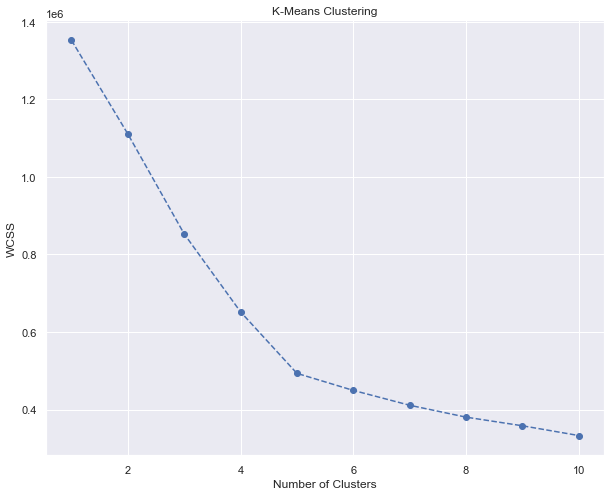

In [230]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss, marker ='o', linestyle = '--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-Means Clustering")
plt.show()

In [313]:
kmeans = KMeans(n_clusters = 5, init='k-means++', random_state = 42)

In [314]:
kmeans.fit(std_data)

KMeans(n_clusters=5, random_state=42)

In [315]:
df_segm_kmeans = data_train.copy()

In [316]:
df_segm_kmeans['Segment Kmeans'] = kmeans.labels_

In [317]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment Kmeans']).mean()

In [318]:
df_segm_analysis

,total_bought,uxp_reorder_ratio,Total_orders,U_reorder_ratio,(N)Product_purchased,P_reorder_ratio,Cart_priority,reordered
Segment Kmeans,,,,,,,,
0,1.000000,0.776667,11.419237,0.354143,250.000741,0.517753,8.058573,0.008135
1,1.047069,0.403614,28.914687,0.659096,5294.141870,0.810510,5.950283,0.399794
2,1.000000,0.125116,40.752155,0.689847,304.229646,0.581233,9.388072,0.000152
3,1.000000,0.476868,25.694047,0.669668,409.596537,0.647660,7.420737,1.000000
4,2.104581,0.167420,44.214662,0.767879,599.338964,0.668854,6.885283,0.374165


In [321]:
data_train

total_bought  uxp_reorder_ratio  Total_orders  \
user_id product_id                                                  
2       16589                  1           1.000000            11   
        32052                  1           0.250000            11   
        32792                  1           0.250000            11   
        41787                  1           0.166667            11   
        48099                  1           0.333333            11   
...                          ...                ...           ...   
206203  16525                  1           1.000000             4   
        25256                  1           0.333333             4   
206209  13176                  1           0.083333            12   
        15700                  1           0.333333            12   
        19348                  1           1.000000            12   

                    U_reorder_ratio  (N)Product_purchased  P_reorder_ratio  \
user_id product_id                                                           
2       16589              0.600000                    97         0.680412   
        32052              0.600000                    68         0.573529   
        32792              0.600000                    24         0.583333   
        41787              0.600000                   551         0.633394   
        48099              0.600000                    42         0.571429   
...                             ...                   ...              ...   
206203  16525              0.500000                    69         0.434783   
        25256              0.500000                   101         0.584158   
206209  13176              0.333333                  5862         0.827192   
        15700              0.333333                    59         0.728814   
        19348              0.333333                   479         0.780793   

                    Cart_priority  reordered  
user_id product_id                            
2       16589                  10        1.0  
        32052                   7        0.0  
        32792                   1        1.0  
        41787                  19        1.0  
        48099                  19        0.0  
...                           ...        ...  
206203  16525                  24        0.0  
        25256                  25        0.0  
206209  13176                  10        0.0  
        15700                   3        0.0  
        19348                   4        0.0  

[303272 rows x 8 columns]

In [320]:
df_segm_kmeans.to_csv("kmeans_sprint3.csv")

In [349]:
data_train.iloc[:10,:]

total_bought  uxp_reorder_ratio  Total_orders  \
user_id product_id                                                  
2       16589                  1           1.000000            11   
        32052                  1           0.250000            11   
        32792                  1           0.250000            11   
        41787                  1           0.166667            11   
        48099                  1           0.333333            11   
7       18880                  1           1.000000            18   
        22742                  1           0.250000            18   
8       24838                  1           1.000000             1   
10      4920                   1           1.000000             3   
        44359                  1           1.000000             3   

                    U_reorder_ratio  (N)Product_purchased  P_reorder_ratio  \
user_id product_id                                                           
2       16589                   0.6                    97         0.680412   
        32052                   0.6                    68         0.573529   
        32792                   0.6                    24         0.583333   
        41787                   0.6                   551         0.633394   
        48099                   0.6                    42         0.571429   
7       18880                   0.0                   120         0.341667   
        22742                   0.0                     1         0.000000   
8       24838                   0.0                   749         0.761015   
10      4920                    0.0                  1260         0.662698   
        44359                   0.0                  1094         0.619744   

                    Cart_priority  reordered  
user_id product_id                            
2       16589                  10        1.0  
        32052                   7        0.0  
        32792                   1        1.0  
        41787                  19        1.0  
        48099                  19        0.0  
7       18880                  12        0.0  
        22742                   6        0.0  
8       24838                   8        0.0  
10      4920                   20        0.0  
        44359                   6        0.0

In [325]:
orders_sample

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1199898,2,prior,6,2,9,13.0,41787,19,0
1,788338,2,prior,8,1,15,27.0,32052,7,1
2,788338,2,prior,8,1,15,27.0,32792,1,1
3,1718559,2,prior,9,2,9,8.0,48099,19,0
4,1402090,2,prior,11,1,10,30.0,16589,10,1
...,...,...,...,...,...,...,...,...,...,...
499995,1285346,206208,prior,48,1,11,5.0,43086,7,1
499996,1882108,206208,prior,49,1,22,7.0,23579,3,1
499997,3154581,206209,prior,1,3,11,0.0,13176,10,0
499998,2266710,206209,prior,10,5,18,29.0,15700,3,0


In [326]:
freq = orders_sample.groupby('user_id')['days_since_prior_order'].mean().to_frame("Frequency_V")

In [328]:
freq = freq.reset_index()

In [360]:
user = user.merge(freq,on='user_id',how='left')

In [345]:
p_purchased = orders_sample[['user_id','order_number']].groupby('user_id').count().rename(columns={'order_number':"frequency"})

In [359]:
freq

,user_id,Frequency_V
0,2,21.000000
1,6,6.000000
2,7,4.500000
3,8,0.000000
4,10,12.000000
...,...,...
139909,206204,9.000000
139910,206206,5.000000
139911,206207,7.200000
139912,206208,8.866667


In [353]:
user = user.merge(p_purchased, on='user_id',how='left')

In [356]:
user = user.iloc[:,:-1]

In [347]:
p_purchased

,frequency
user_id,
2,5
6,1
7,2
8,1
10,2
...,...
206204,1
206206,3
206207,5


In [361]:
user

,user_id,Total_orders,U_reorder_ratio,Frequency_V
0,2,5,0.600000,21.000000
1,6,1,0.000000,6.000000
2,7,2,0.000000,4.500000
3,8,1,0.000000,0.000000
4,10,2,0.000000,12.000000
...,...,...,...,...
139909,206204,1,0.000000,9.000000
139910,206206,3,0.666667,5.000000
139911,206207,5,0.800000,7.200000
139912,206208,15,0.933333,8.866667


In [362]:
add_cart

,user_id,product_id,Cart_priority
0,2,16589,10.0
1,2,32052,7.0
2,2,32792,1.0
3,2,41787,19.0
4,2,48099,19.0
...,...,...,...
476866,206208,43086,7.0
476867,206208,44359,5.0
476868,206209,13176,10.0
476869,206209,15700,3.0


In [363]:
order_cart = orders_sample.groupby(['user_id','order_id'])['add_to_cart_order'].max().to_frame("Cart size")

In [365]:
order_cart = order_cart.reset_index()

In [366]:
user_cart = order_cart.groupby('user_id')['Cart size'].mean().to_frame("Avg_cart_size")

In [368]:
user_cart = user_cart.reset_index()

In [369]:
max_cart = order_cart.groupby('user_id')['Cart size'].max().to_frame("Max_cart_size")

In [370]:
max_cart = max_cart.reset_index()

In [371]:
max_cart

,user_id,Max_cart_size
0,2,19
1,6,3
2,7,12
3,8,8
4,10,20
...,...,...
139909,206204,7
139910,206206,1
139911,206207,10
139912,206208,16


In [374]:
user = user.merge(max_cart,on='user_id',how='left')

In [375]:
user = user.merge(user_cart,on='user_id',how='left')

In [377]:
user.isnull().sum()

user_id            0
Total_orders       0
U_reorder_ratio    0
Frequency_V        0
Max_cart_size      0
Avg_cart_size      0
dtype: int64

In [378]:
user

,user_id,Total_orders,U_reorder_ratio,Frequency_V,Max_cart_size,Avg_cart_size
0,2,5,0.600000,21.000000,19,13.750000
1,6,1,0.000000,6.000000,3,3.000000
2,7,2,0.000000,4.500000,12,9.000000
3,8,1,0.000000,0.000000,8,8.000000
4,10,2,0.000000,12.000000,20,20.000000
...,...,...,...,...,...,...
139909,206204,1,0.000000,9.000000,7,7.000000
139910,206206,3,0.666667,5.000000,1,1.000000
139911,206207,5,0.800000,7.200000,10,6.250000
139912,206208,15,0.933333,8.866667,16,6.357143


In [379]:
order_product = orders_sample.groupby('order_id')['product_id'].count().to_frame("Products_purchased")

In [380]:
order_product = order_product.reset_index()

In [381]:
order_product

,order_id,Products_purchased
0,3,1
1,10,1
2,18,1
3,32,1
4,33,1
...,...,...
448721,3421044,2
448722,3421051,1
448723,3421055,1
448724,3421061,1


In [382]:
user_order = orders_sample[['user_id','order_id']].merge(order_product, on='order_id',how='left')

In [384]:
user_order = user_order.groupby("user_id")['Products_purchased'].sum().to_frame("Products_purchased_total")

In [386]:
user_order = user_order.reset_index()

In [387]:
user = user.merge(user_order,on='user_id',how='left')

In [399]:
user = user.set_index("user_id")

In [400]:
wcss = [] 
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(user.values)
    wcss.append(kmeans.inertia_)

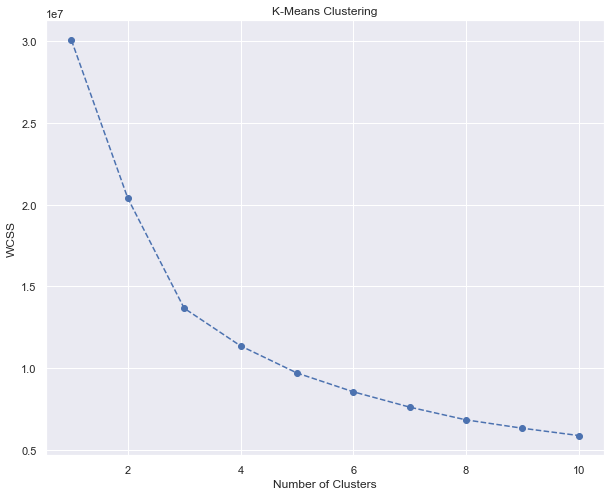

In [401]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss, marker ='o', linestyle = '--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-Means Clustering")
plt.show()

In [402]:
user_std = sc.fit_transform(user)

In [403]:
user_std

array([[ 0.38127561,  0.30133211,  0.99322692,  0.94909297,  1.24070276,
         0.49062391],
       [-0.68793911, -1.24443721, -0.73442079, -0.94915232, -0.87281907,
        -0.63391377],
       [-0.42063543, -1.24443721, -0.90718557,  0.11861065,  0.30682102,
        -0.44649082],
       ...,
       [ 0.38127561,  0.81658855, -0.59620898, -0.11867001, -0.23384735,
         0.49062391],
       [ 3.05431239,  1.16009285, -0.40424812,  0.59317197, -0.21278235,
         2.36485337],
       [-0.15333175, -0.38567648,  0.37895217, -0.11867001, -0.34853458,
        -0.25906788]])

In [404]:
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state = 42)

In [405]:
kmeans.fit(user_std)

KMeans(n_clusters=3, random_state=42)

In [413]:
df_segm_kmeans = user.copy()

In [414]:
df_segm_kmeans['Segment Kmeans'] = kmeans.labels_

In [505]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment Kmeans']).mean()

In [506]:
df_segm_analysis

,Total_orders,U_reorder_ratio,Frequency_V,Max_cart_size,Avg_cart_size,Products_purchased_total
Segment Kmeans,,,,,,
Frequent,2.246105,0.496233,12.358431,5.989287,4.550193,2.461957
Most Valuable,11.928930,0.711710,7.905118,21.902001,10.291111,15.968561
Regular,3.139185,0.355649,14.307684,18.079293,12.971911,3.965063


In [407]:
user2 = user.reset_index()

In [408]:
user2

,user_id,Total_orders,U_reorder_ratio,Frequency_V,Max_cart_size,Avg_cart_size,Products_purchased_total
0,2,5,0.600000,21.000000,19,13.750000,7
1,6,1,0.000000,6.000000,3,3.000000,1
2,7,2,0.000000,4.500000,12,9.000000,2
3,8,1,0.000000,0.000000,8,8.000000,1
4,10,2,0.000000,12.000000,20,20.000000,4
...,...,...,...,...,...,...,...
139909,206204,1,0.000000,9.000000,7,7.000000,1
139910,206206,3,0.666667,5.000000,1,1.000000,3
139911,206207,5,0.800000,7.200000,10,6.250000,7
139912,206208,15,0.933333,8.866667,16,6.357143,17


In [418]:
df_segm_kmeans

,Total_orders,U_reorder_ratio,Frequency_V,Max_cart_size,Avg_cart_size,Products_purchased_total,Segment Kmeans
user_id,,,,,,,
2,5,0.600000,21.000000,19,13.750000,7,0
6,1,0.000000,6.000000,3,3.000000,1,2
7,2,0.000000,4.500000,12,9.000000,2,0
8,1,0.000000,0.000000,8,8.000000,1,2
10,2,0.000000,12.000000,20,20.000000,4,0
...,...,...,...,...,...,...,...
206204,1,0.000000,9.000000,7,7.000000,1,2
206206,3,0.666667,5.000000,1,1.000000,3,2
206207,5,0.800000,7.200000,10,6.250000,7,2


In [419]:
user_final = df_segm_kmeans.reset_index()

In [421]:
user_final.to_csv("kmeans_final.csv")

In [422]:
orders_sample

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1199898,2,prior,6,2,9,13.0,41787,19,0
1,788338,2,prior,8,1,15,27.0,32052,7,1
2,788338,2,prior,8,1,15,27.0,32792,1,1
3,1718559,2,prior,9,2,9,8.0,48099,19,0
4,1402090,2,prior,11,1,10,30.0,16589,10,1
...,...,...,...,...,...,...,...,...,...,...
499995,1285346,206208,prior,48,1,11,5.0,43086,7,1
499996,1882108,206208,prior,49,1,22,7.0,23579,3,1
499997,3154581,206209,prior,1,3,11,0.0,13176,10,0
499998,2266710,206209,prior,10,5,18,29.0,15700,3,0


In [423]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [424]:
organic = []
for i in products['product_name']:
    if "Organic" in i:
        organic.append(1)
    else:
        organic.append(0)
        

In [425]:
organic

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,


In [426]:
products['Organic'] = organic

In [428]:
products[products['Organic']==1]

,product_id,product_name,aisle_id,department_id,Organic
22,23,Organic Turkey Burgers,49,12,1
32,33,Organic Spaghetti Style Pasta,131,9,1
40,41,Organic Sourdough Einkorn Crackers Rosemary,78,19,1
42,43,Organic Clementines,123,4,1
46,47,Onion Flavor Organic Roasted Seaweed Snack,66,6,1
...,...,...,...,...,...
49605,49606,Organic Natural Red,28,5,1
49607,49608,Certified Organic Spanish Style Rice With Quin...,4,9,1
49637,49638,Organic Superfirm Vacuum Packed Tofu,14,20,1
49652,49653,Organic Aromatherapeutic Moroccan Argan Oil Set,25,11,1


In [439]:
meat = []
for i in products['product_name']:
    if "meat" in i.lower():
        meat.append(1)
    else:
        meat.append(0)

In [441]:
products['Meat'] = meat

In [442]:
frozen = []
for i in products['product_name']:
    if "frozen" in i.lower():
        frozen.append(1)
    else:
        frozen.append(0)

In [443]:
products['frozen'] = frozen

In [444]:
products

,product_id,product_name,aisle_id,department_id,Organic,Meat,frozen
0,1,Chocolate Sandwich Cookies,61,19,0,0,0
1,2,All-Seasons Salt,104,13,0,0,0
2,3,Robust Golden Unsweetened Oolong Tea,94,7,0,0,0
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,0,0,0
4,5,Green Chile Anytime Sauce,5,13,0,0,0
...,...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,0,0,0
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,0,0,0
49685,49686,Artisan Baguette,112,3,0,0,0
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,0,0,0


In [446]:
user_category = orders_sample[['user_id','product_id']].merge(products,on='product_id',how='left')

In [448]:
user_category.to_csv("user_category.csv")

In [450]:
orders_sample.to_csv("sprint3_orders.csv")

In [504]:
df_segm_kmeans['Segment Kmeans']

user_id
2               Regular
6              Frequent
7               Regular
8              Frequent
10              Regular
              ...      
206204         Frequent
206206         Frequent
206207         Frequent
206208    Most Valuable
206209         Frequent
Name: Segment Kmeans, Length: 139914, dtype: object

In [454]:
label = []
for i in df_segm_kmeans['Segment Kmeans']:
    if i==0:
        label.append("Regular")
    elif i==1:
        label.append("Most Valuable")
    else:
        label.append("Frequent")
        

In [503]:
df_segm_kmeans['Segment Kmeans'] = label

In [458]:
df_segm_kmeans.to_csv("kmeans_final2.csv")

,Total_orders,U_reorder_ratio,Frequency_V,Max_cart_size,Avg_cart_size,Products_purchased_total,Segment Kmeans
user_id,,,,,,,
2,5,0.600000,21.000000,19,13.750000,7,Regular
6,1,0.000000,6.000000,3,3.000000,1,Frequent
7,2,0.000000,4.500000,12,9.000000,2,Regular
8,1,0.000000,0.000000,8,8.000000,1,Frequent
10,2,0.000000,12.000000,20,20.000000,4,Regular
...,...,...,...,...,...,...,...
206204,1,0.000000,9.000000,7,7.000000,1,Frequent
206206,3,0.666667,5.000000,1,1.000000,3,Frequent
206207,5,0.800000,7.200000,10,6.250000,7,Frequent


In [466]:
last_order = orders_sample[['user_id','order_id']].groupby('user_id')['order_id'].max().to_frame("order_id")

In [467]:
last_order = last_order.reset_index()

In [469]:
last_order = last_order.merge(orders_sample[['order_id','days_since_prior_order']],how='left',on='order_id')

In [476]:
last_order = last_order.rename(columns = {"days_since_prior_order":"Days_since_last_order"})

In [478]:
last_order.to_csv("last_order.csv")

In [479]:
kmeans2 = KMeans(n_clusters = 4, init='k-means++', random_state = 42)

In [481]:
user

,Total_orders,U_reorder_ratio,Frequency_V,Max_cart_size,Avg_cart_size,Products_purchased_total
user_id,,,,,,
2,5,0.600000,21.000000,19,13.750000,7
6,1,0.000000,6.000000,3,3.000000,1
7,2,0.000000,4.500000,12,9.000000,2
8,1,0.000000,0.000000,8,8.000000,1
10,2,0.000000,12.000000,20,20.000000,4
...,...,...,...,...,...,...
206204,1,0.000000,9.000000,7,7.000000,1
206206,3,0.666667,5.000000,1,1.000000,3
206207,5,0.800000,7.200000,10,6.250000,7


In [482]:
kmeans2.fit(user_std)

KMeans(n_clusters=4, random_state=42)

In [483]:
df_segm_kmeans2 = user.copy()

In [486]:
df_segm_kmeans2['Segment Kmeans'] = kmeans2.labels_

In [498]:
df_segm_analysis2 = df_segm_kmeans2.groupby(['Segment Kmeans']).mean()

In [488]:
df_segm_analysis2

,Total_orders,U_reorder_ratio,Frequency_V,Max_cart_size,Avg_cart_size,Products_purchased_total
Segment Kmeans,,,,,,
0,2.787240,0.805704,12.729673,6.814938,4.762530,3.078275
1,3.647435,0.403720,13.968234,20.188725,13.882413,4.709362
2,1.666006,0.040078,12.284211,6.434123,5.495379,1.843828
3,12.696536,0.715607,7.659311,22.367922,10.370572,17.083584


In [490]:
label2 = []
for i in df_segm_kmeans2['Segment Kmeans']:
    if i==0:
        label2.append("Consistent")
    elif i==1:
        label2.append("Non-frequent")
    elif i==2:
        label2.append("Low priority")
    else:
        label2.append("Frequent")
    
        

In [491]:
label2

['Non-frequent',
 'Low priority',
 'Low priority',
 'Low priority',
 'Non-frequent',
 'Consistent',
 'Non-frequent',
 'Low priority',
 'Non-frequent',
 'Consistent',
 'Low priority',
 'Consistent',
 'Low priority',
 'Non-frequent',
 'Consistent',
 'Consistent',
 'Low priority',
 'Low priority',
 'Frequent',
 'Non-frequent',
 'Low priority',
 'Non-frequent',
 'Consistent',
 'Consistent',
 'Non-frequent',
 'Consistent',
 'Consistent',
 'Non-frequent',
 'Low priority',
 'Consistent',
 'Low priority',
 'Non-frequent',
 'Low priority',
 'Consistent',
 'Frequent',
 'Low priority',
 'Consistent',
 'Low priority',
 'Consistent',
 'Consistent',
 'Consistent',
 'Low priority',
 'Consistent',
 'Low priority',
 'Non-frequent',
 'Low priority',
 'Consistent',
 'Low priority',
 'Consistent',
 'Consistent',
 'Non-frequent',
 'Consistent',
 'Consistent',
 'Non-frequent',
 'Consistent',
 'Non-frequent',
 'Consistent',
 'Low priority',
 'Low priority',
 'Low priority',
 'Consistent',
 'Consistent',
 'Co

In [492]:
df_segm_kmeans2['Segment Kmeans'] = label2

In [493]:
df_segm_kmeans2.to_csv("kmeans_clusters4.csv")

In [494]:
df_segm_analysis

,Total_orders,U_reorder_ratio,Frequency_V,Max_cart_size,Avg_cart_size,Products_purchased_total
Segment Kmeans,,,,,,
0,3.139185,0.355649,14.307684,18.079293,12.971911,3.965063
1,11.928930,0.711710,7.905118,21.902001,10.291111,15.968561
2,2.246105,0.496233,12.358431,5.989287,4.550193,2.461957


In [499]:
df_segm_analysis2

,Total_orders,U_reorder_ratio,Frequency_V,Max_cart_size,Avg_cart_size,Products_purchased_total
Segment Kmeans,,,,,,
Consistent,2.787240,0.805704,12.729673,6.814938,4.762530,3.078275
Frequent,12.696536,0.715607,7.659311,22.367922,10.370572,17.083584
Low priority,1.666006,0.040078,12.284211,6.434123,5.495379,1.843828
Non-frequent,3.647435,0.403720,13.968234,20.188725,13.882413,4.709362


In [502]:
label

['Regular',
 'Frequent',
 'Regular',
 'Frequent',
 'Regular',
 'Frequent',
 'Regular',
 'Frequent',
 'Regular',
 'Frequent',
 'Frequent',
 'Frequent',
 'Frequent',
 'Regular',
 'Frequent',
 'Frequent',
 'Frequent',
 'Frequent',
 'Most Valuable',
 'Regular',
 'Frequent',
 'Regular',
 'Regular',
 'Frequent',
 'Regular',
 'Frequent',
 'Frequent',
 'Most Valuable',
 'Regular',
 'Frequent',
 'Frequent',
 'Regular',
 'Frequent',
 'Frequent',
 'Most Valuable',
 'Frequent',
 'Frequent',
 'Regular',
 'Frequent',
 'Frequent',
 'Frequent',
 'Frequent',
 'Frequent',
 'Frequent',
 'Regular',
 'Frequent',
 'Frequent',
 'Frequent',
 'Frequent',
 'Frequent',
 'Regular',
 'Frequent',
 'Frequent',
 'Regular',
 'Frequent',
 'Regular',
 'Frequent',
 'Frequent',
 'Frequent',
 'Frequent',
 'Frequent',
 'Frequent',
 'Frequent',
 'Regular',
 'Frequent',
 'Frequent',
 'Frequent',
 'Most Valuable',
 'Regular',
 'Frequent',
 'Frequent',
 'Frequent',
 'Regular',
 'Frequent',
 'Frequent',
 'Regular',
 'Frequent',


In [507]:
df_segm_analysis.to_csv("kmeans_analysis.csv")
df_segm_analysis2.to_csv("kmeans_analysis2.csv")